In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
np.random.seed(1)
%matplotlib inline

In [2]:
def generate_data(n=200):
    x = np.linspace(0, np.pi, n // 2)
    u = np.stack([np.cos(x) + .5, -np.sin(x)], axis=1) * 10.
    u += np.random.normal(size=u.shape)
    v = np.stack([np.cos(x) - .5, np.sin(x)], axis=1) * 10.
    v += np.random.normal(size=v.shape)
    x = np.concatenate([u, v], axis=0)
    y = np.zeros(n)
    y[0] = 1
    y[-1] = -1
    return x, y

In [3]:
def train(x, y, h=1, l=1., nu=1.):
    
    diff = x[None] - x[:, None]
    phi = np.zeros((x.shape[0], x.shape[0]))
    for i in range(phi.shape[0]):
        phi[i] = np.exp(-np.linalg.norm(diff[i], ord=2, axis=1) ** 2 / (2 * h ** 2))
    phi_tilde = phi[:n, :]
    W = phi.copy()
    D = np.diag(W.sum(axis=1))
    L = D - W
    
    return np.linalg.solve(phi_tilde.T.dot(phi_tilde) + l * np.eye(len(x)) + 2 * nu * phi.T.dot(L).dot(phi), phi_tilde.T.dot(y[:n]))

In [4]:
def visualize(x, y, theta, h=1.):
    plt.clf()
    plt.figure(figsize=(6, 6))
    plt.xlim(-20., 20.)
    plt.ylim(-20., 20.)
    grid_size = 100
    grid = np.linspace(-20., 20., grid_size)
    X, Y = np.meshgrid(grid, grid)
    mesh_grid = np.stack([np.ravel(X), np.ravel(Y)], axis=1)
    k = np.exp(-np.sum((x.astype(np.float32)[:, None] - mesh_grid.astype(
        np.float32)[None]) ** 2, axis=2).astype(np.float64) / (2 * h ** 2))
    plt.contourf(X, Y, np.reshape(np.sign(k.T.dot(theta)),
                                  (grid_size, grid_size)),
                 alpha=.4, cmap=plt.cm.coolwarm)
    plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], marker='$.$', c='black')
    plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], marker='$X$', c='red')
    plt.scatter(x[y == -1][:, 0], x[y == -1][:, 1], marker='$O$', c='blue')

<Figure size 432x288 with 0 Axes>

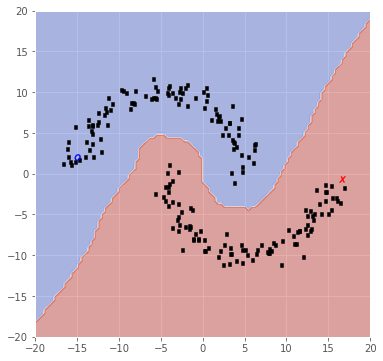

In [5]:
x, y = generate_data()
#sort
n = len(np.concatenate([y[y == 1], y[y == -1]]))
x = np.concatenate([x[y == 1], x[y == -1], x[y == 0]])
y = np.concatenate([y[y == 1], y[y == -1], y[y == 0]])

theta = train(x, y)
visualize(x, y, theta)